In [57]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
nltk.download('movie_reviews')


In [16]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [20]:
texts = [" ".join(doc) for doc, label in documents]
labels = [label for doc, label in documents]


In [30]:
# Section 2: Train and Evaluate Naive Bayes
def train_evaluate_naive_bayes(test_sizes):
    results = {'Split': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Accuracy': []}

    for test_size in test_sizes:
        print(f"\n--- Naive Bayes: {100 - int(test_size * 100)}% training | {int(test_size * 100)}% testing ---")

        # Split and Vectorize Data
        X_train, X_test, y_train, y_test = train_test_split(
            texts, labels, test_size=test_size, random_state=42
        )

        vectorizer = CountVectorizer()
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        # Train and Evaluate Model
        model = MultinomialNB()
        model.fit(X_train_vec, y_train)

        y_pred = model.predict(X_test_vec)
        precision = precision_score(y_test, y_pred, pos_label="pos", average="binary")
        recall = recall_score(y_test, y_pred, pos_label="pos", average="binary")
        f1 = f1_score(y_test, y_pred, pos_label="pos", average="binary")
        accuracy = accuracy_score(y_test, y_pred)

        # Save results for graph
        results['Split'].append(f"{int((1 - test_size) * 100)}-{int(test_size * 100)}")
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['Accuracy'].append(accuracy)

        # Print classification report
        print(classification_report(y_test, y_pred))

    # Plot Results
    plot_results(results, "Naive Bayes")

In [32]:
# Section 3: Train and Evaluate Logistic Regression
def train_evaluate_logistic_regression(test_sizes):
    results = {'Split': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Accuracy': []}

    for test_size in test_sizes:
        print(f"\n--- Logistic Regression: {100 - int(test_size * 100)}% training | {int(test_size * 100)}% testing ---")

        # Split and Vectorize Data
        X_train, X_test, y_train, y_test = train_test_split(
            texts, labels, test_size=test_size, random_state=42
        )

        vectorizer = CountVectorizer()
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        # Train and Evaluate Model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train_vec, y_train)

        y_pred = model.predict(X_test_vec)
        precision = precision_score(y_test, y_pred, pos_label="pos", average="binary")
        recall = recall_score(y_test, y_pred, pos_label="pos", average="binary")
        f1 = f1_score(y_test, y_pred, pos_label="pos", average="binary")
        accuracy = accuracy_score(y_test, y_pred)

        # Save results for graph
        results['Split'].append(f"{int((1 - test_size) * 100)}-{int(test_size * 100)}")
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['Accuracy'].append(accuracy)

        # Print classification report
        print(classification_report(y_test, y_pred))

    # Plot Results
    plot_results(results, "Logistic Regression")


In [49]:
# Section 4: Train and Evaluate Random Forest
def train_evaluate_random_forest(test_sizes):
    results = {'Split': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Accuracy': []}

    for test_size in test_sizes:
        print(f"\n--- Random Forest: {100 - int(test_size * 100)}% training | {int(test_size * 100)}% testing ---")

        # Split and Vectorize Data
        X_train, X_test, y_train, y_test = train_test_split(
            texts, labels, test_size=test_size, random_state=42
        )

        vectorizer = CountVectorizer()
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        # Train and Evaluate Model
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train_vec, y_train)

        y_pred = model.predict(X_test_vec)
        precision = precision_score(y_test, y_pred, pos_label="pos", average="binary")
        recall = recall_score(y_test, y_pred, pos_label="pos", average="binary")
        f1 = f1_score(y_test, y_pred, pos_label="pos", average="binary")
        accuracy = accuracy_score(y_test, y_pred)

        # Save results for graph
        results['Split'].append(f"{int((1 - test_size) * 100)}-{int(test_size * 100)}")
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['Accuracy'].append(accuracy)

        # Print classification report
        print(classification_report(y_test, y_pred))

    # Plot Results
    plot_results(results, "Random Forest")

# Section 5: Plot Results
def plot_results(results, title):
    metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
    x = range(len(results['Split']))
    plt.figure(figsize=(10, 6))
    for metric in metrics:
        plt.plot(x, results[metric], marker='o', label=metric)

    plt.xticks(x, results['Split'])
    plt.xlabel('Train-Test Split')
    plt.ylabel('Score')
    plt.title(f'Model Evaluation Metrics Across Splits - {title}')
    plt.legend()
    plt.grid()
    plt.show()


In [53]:
#Train and Evaluate SVM
def train_evaluate_svm(test_sizes):
    results = {'Split': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'Accuracy': []}

    for test_size in test_sizes:
        print(f"\n--- SVM: {100 - int(test_size * 100)}% training | {int(test_size * 100)}% testing ---")

        # Split and Vectorize Data
        X_train, X_test, y_train, y_test = train_test_split(
            texts, labels, test_size=test_size, random_state=42
        )

        vectorizer = CountVectorizer()
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        # Train and Evaluate Model
        model = SVC(kernel='linear', random_state=42)
        model.fit(X_train_vec, y_train)

        y_pred = model.predict(X_test_vec)
        precision = precision_score(y_test, y_pred, pos_label="pos", average="binary")
        recall = recall_score(y_test, y_pred, pos_label="pos", average="binary")
        f1 = f1_score(y_test, y_pred, pos_label="pos", average="binary")
        accuracy = accuracy_score(y_test, y_pred)

        # Save results for graph
        results['Split'].append(f"{int((1 - test_size) * 100)}-{int(test_size * 100)}")
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['Accuracy'].append(accuracy)

        # Print classification report
        print(classification_report(y_test, y_pred))

    # Plot Results
    plot_results(results, "SVM")



--- Naive Bayes: 70% training | 30% testing ---
              precision    recall  f1-score   support

         neg       0.80      0.83      0.82       302
         pos       0.82      0.79      0.81       298

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600


--- Naive Bayes: 50% training | 50% testing ---
              precision    recall  f1-score   support

         neg       0.80      0.81      0.81       507
         pos       0.80      0.80      0.80       493

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000


--- Naive Bayes: 90% training | 10% testing ---
              precision    recall  f1-score   support

         neg       0.78      0.86      0.82        99
         pos       0.85      0.76      0.80       101

    accuracy                       

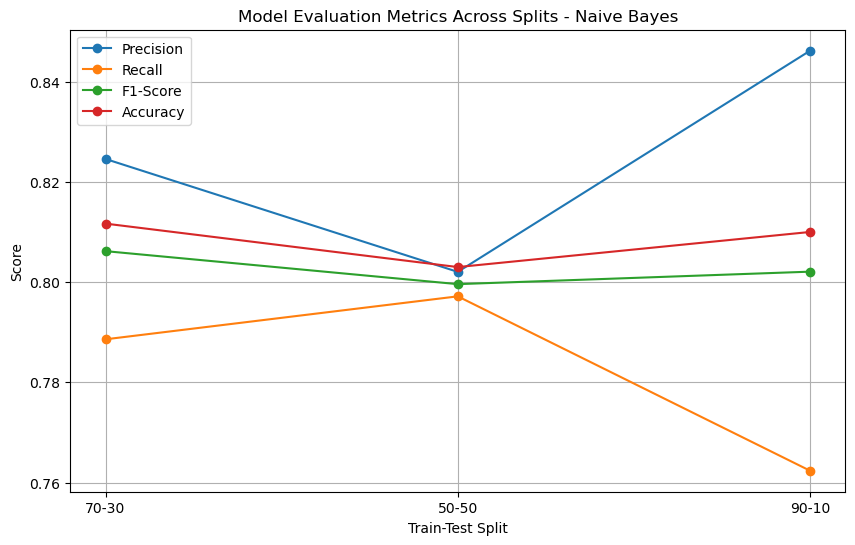

In [44]:
# Perform Sentiment Analysis
splits = [0.3, 0.5, 0.1]  # Test sizes for 70-30, 50-50, and 90-10
train_evaluate_naive_bayes(splits)


--- Logistic Regression: 70% training | 30% testing ---
              precision    recall  f1-score   support

         neg       0.82      0.82      0.82       302
         pos       0.82      0.82      0.82       298

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600


--- Logistic Regression: 50% training | 50% testing ---
              precision    recall  f1-score   support

         neg       0.83      0.83      0.83       507
         pos       0.82      0.82      0.82       493

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000


--- Logistic Regression: 90% training | 10% testing ---
              precision    recall  f1-score   support

         neg       0.78      0.88      0.83        99
         pos       0.87      0.76      0.81       101

    accurac

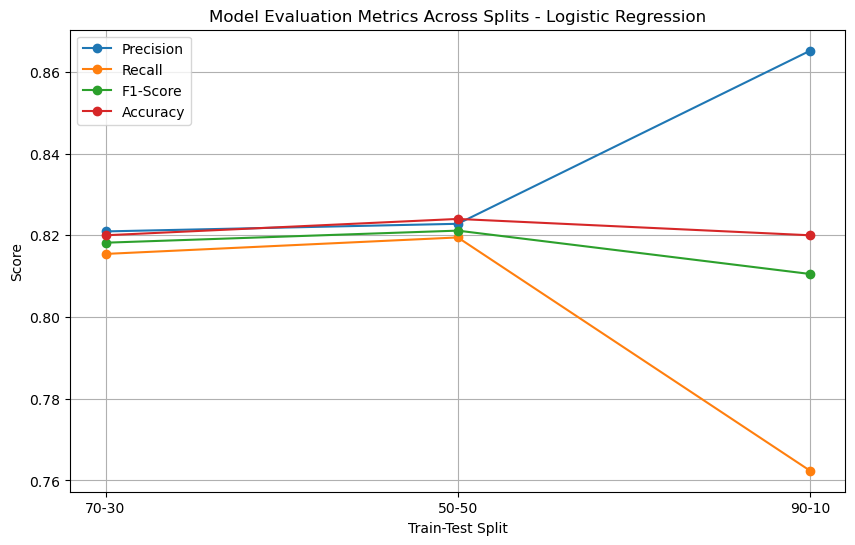

In [38]:
train_evaluate_logistic_regression(splits)


--- Random Forest: 70% training | 30% testing ---
              precision    recall  f1-score   support

         neg       0.77      0.80      0.78       302
         pos       0.79      0.75      0.77       298

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600


--- Random Forest: 50% training | 50% testing ---
              precision    recall  f1-score   support

         neg       0.79      0.80      0.79       507
         pos       0.79      0.78      0.79       493

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000


--- Random Forest: 90% training | 10% testing ---
              precision    recall  f1-score   support

         neg       0.80      0.88      0.84        99
         pos       0.87      0.78      0.82       101

    accuracy                 

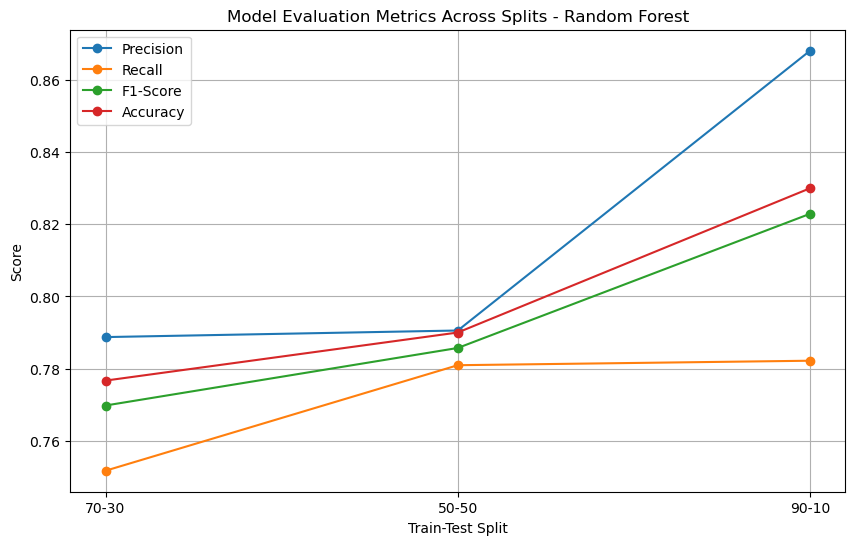

In [39]:
train_evaluate_random_forest(splits)


--- SVM: 70% training | 30% testing ---
              precision    recall  f1-score   support

         neg       0.80      0.81      0.81       302
         pos       0.81      0.80      0.80       298

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600


--- SVM: 50% training | 50% testing ---
              precision    recall  f1-score   support

         neg       0.81      0.82      0.82       507
         pos       0.81      0.81      0.81       493

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000


--- SVM: 90% training | 10% testing ---
              precision    recall  f1-score   support

         neg       0.78      0.85      0.81        99
         pos       0.84      0.76      0.80       101

    accuracy                           0.81       200
   ma

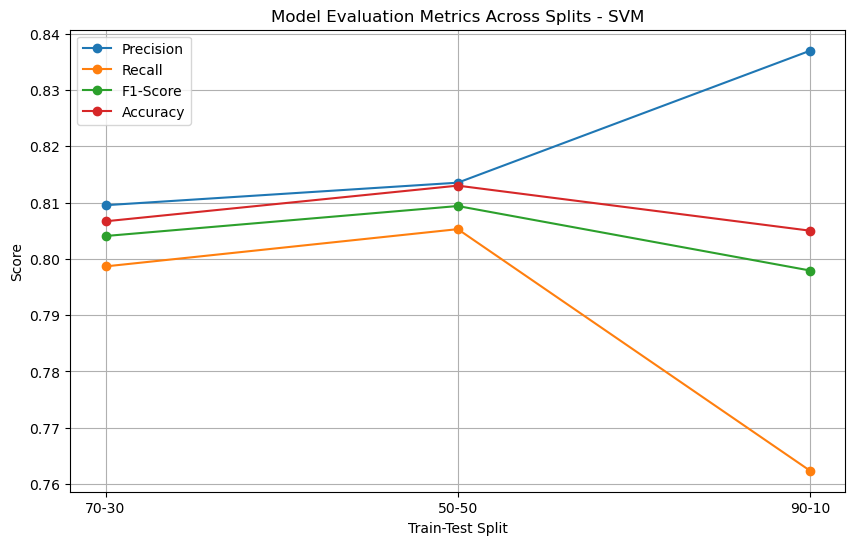

In [59]:
train_evaluate_svm(splits)
